<a href="https://colab.research.google.com/github/ksdtt/ml-pet-projects/blob/main/neural_network_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 6. Нейросеть (цифры)**

Используя наборы данных с цифрами:

- [небольшой встроенный набор](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py), загружаемый с помощью X, y = datasets.load_digits(return_X_y=True) и

- [MNIST](http://yann.lecun.com/exdb/mnist/), его можно загрузить по-разному, например, [как в этом примере](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py): X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


продемонстрируйте:

1. обучение и работу многоклассовой классификации,

2. бинарной классификации на чётные и нечётные цифры,

3. бинарной классификации на '0' и остальные цифры (приведите примеры, когда классификатор ошибается),

4. \* проиллюстрируйте советы по использованию многослойного персептрона.

# **Первый набор данных**

In [ ]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.datasets import load_digits

data = load_digits()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.images.reshape((len(data.images), -1)), data.target, test_size=0.3, random_state=42)

## 1. Многоклассовая классификация. Метод опорных векторов

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.9740740740740741)

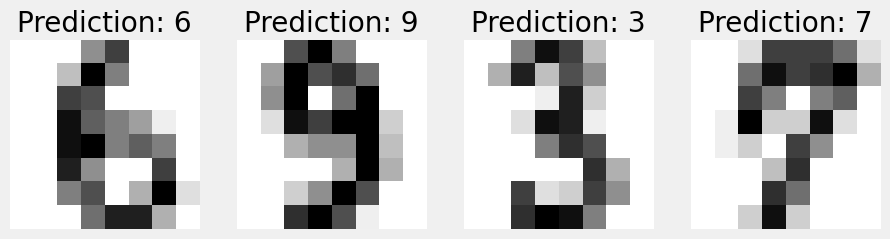

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

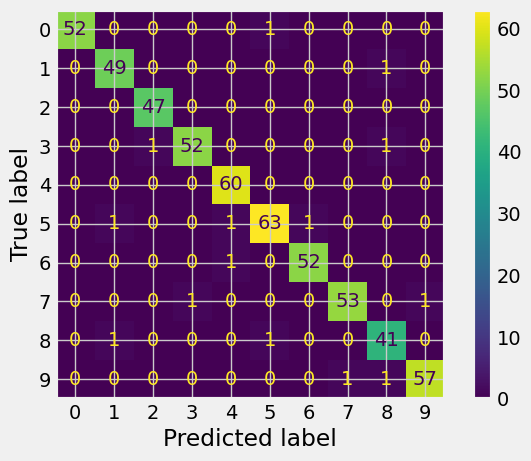

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot();

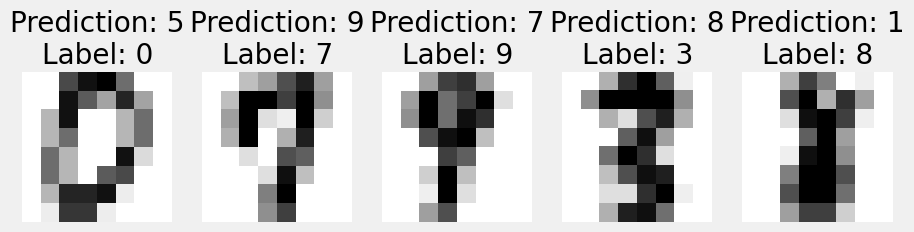

In [ ]:
wa_mask = predicted != y_test

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction, label in zip(axes, X_test[wa_mask],
                                 predicted[wa_mask], y_test[wa_mask]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}\nLabel: {label}")

## 2. Бинарная классификация на чётные и нечётные

если чётная цифра, то метка - 1, иначе - 0

In [ ]:
y_bin = [1 if x%2==0 else 0 for x in y]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

In [ ]:
clf_bin = MLPClassifier()

clf_bin.fit(X_train, y_train)
predicted_bin = clf_bin.predict(X_test)

clf_bin.score(X_train, y_train), clf_bin.score(X_test, y_test)

(1.0, 0.9833333333333333)

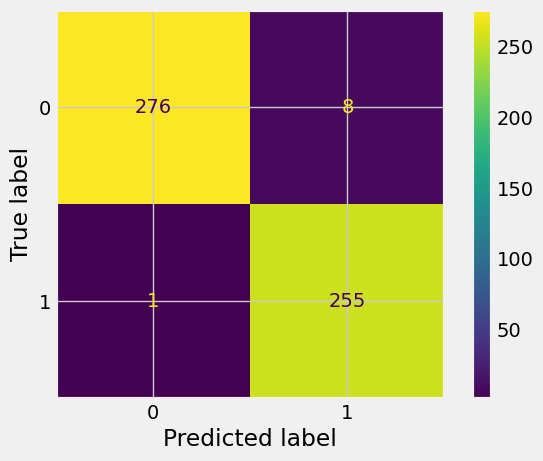

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted_bin, labels=clf_bin.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_bin.classes_).plot();

In [ ]:
length = len(predicted_bin)
errors = []
for i in range(length):
    if predicted_bin[i] != y_test[i]:
        errors.append(i)
errors

[9, 144, 159, 270, 318, 339, 431, 450, 487]

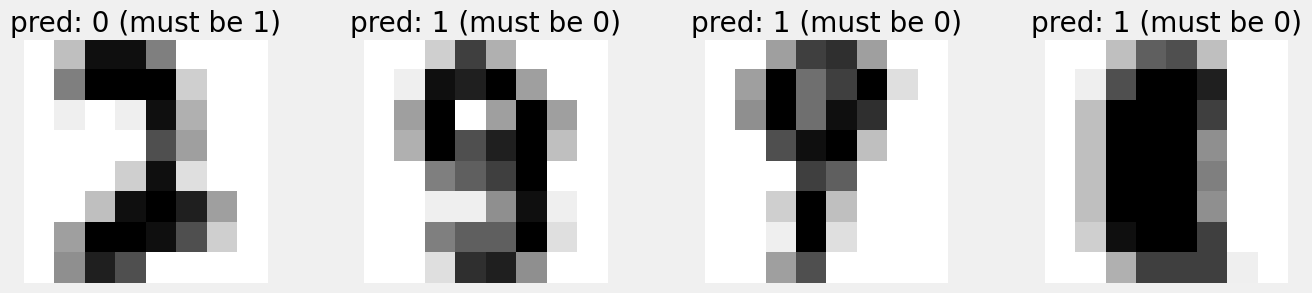

In [ ]:
X_test_wrong = []
y_test_wrong = []
predicted_wrong = []
for i in errors[:4]:
    X_test_wrong.append(X_test[i])
    y_test_wrong.append(y_test[i])
    predicted_wrong.append(predicted_bin[i])

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
for ax, image, y_, prediction_bin in zip(axes, X_test_wrong, y_test_wrong, predicted_wrong):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"pred: {prediction_bin} (must be {y_})")

## 3. Бинарная классификация на 0 и остальные цифры

если "0", то метка - 1, иначе - 0

In [ ]:
y_bin = [1 if x==0 else 0 for x in y]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

In [ ]:
clf_bin = MLPClassifier()

clf_bin.fit(X_train, y_train)
predicted_bin = clf_bin.predict(X_test)

clf_bin.score(X_train, y_train), clf_bin.score(X_test, y_test)

(1.0, 1.0)

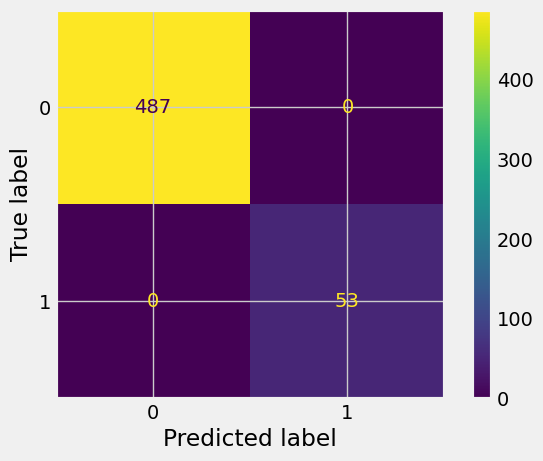

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted_bin, labels=clf_bin.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_bin.classes_).plot();

In [ ]:
length = len(predicted_bin)
errors = []
for i in range(length):
    if predicted_bin[i] != y_test[i]:
        errors.append(i)
errors

[]

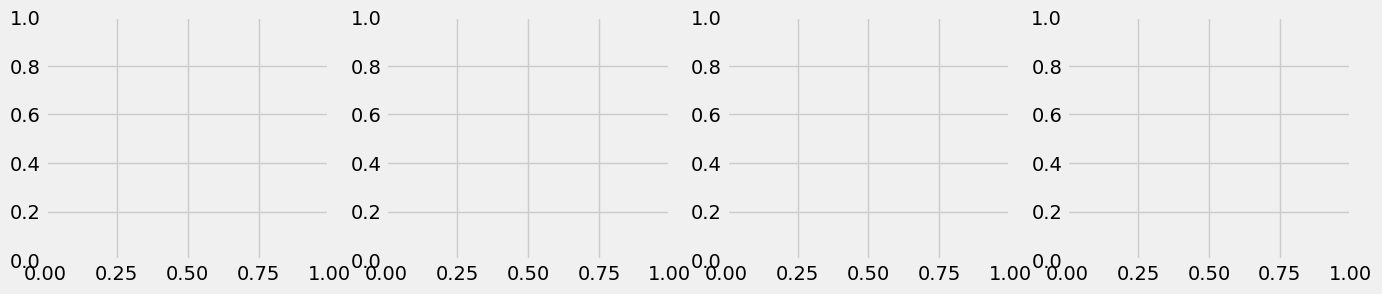

In [ ]:
X_test_wrong = []
y_test_wrong = []
predicted_wrong = []
for i in errors[:4]:
    X_test_wrong.append(X_test[i])
    y_test_wrong.append(y_test[i])
    predicted_wrong.append(predicted_bin[i])

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
for ax, image, y_, prediction_bin in zip(axes, X_test_wrong, y_test_wrong, predicted_wrong):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"pred: {prediction_bin} (must be {y_})")

# **Второй набор даных**

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985
Training set score: 0.986429
Test set score: 0.953061


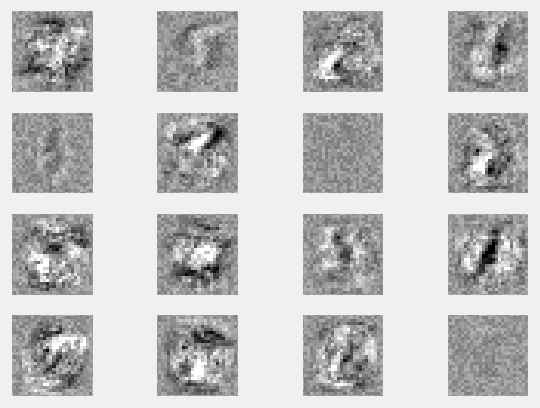

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")

X = X / 255.0

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

# this example won't converge because of resource usage constraints on
# our Continuous Integration infrastructure, so we catch the warning and
# ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

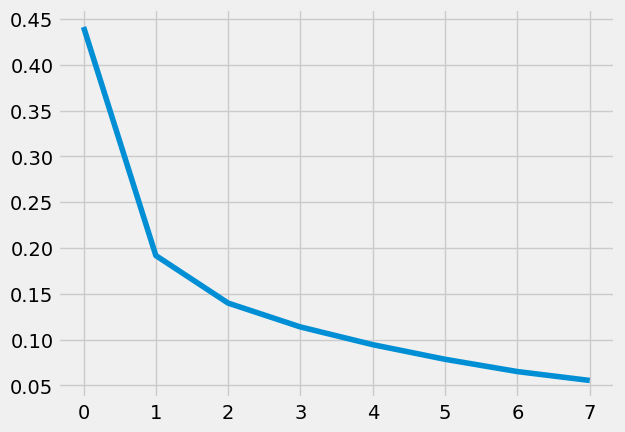

In [ ]:
sns.lineplot(mlp.loss_curve_);

In [ ]:
y = [int(x) for x in y]

y_bin1 = [1 if x%2==0 else 0 for x in y]

y_bin2 = [1 if x==0 else 0 for x in y]

Iteration 1, loss = 0.20253171
Iteration 2, loss = 0.09329501
Iteration 3, loss = 0.06790675
Iteration 4, loss = 0.05491553
Iteration 5, loss = 0.04287826
Iteration 6, loss = 0.03499951
Iteration 7, loss = 0.02698314
Iteration 8, loss = 0.02346474
Training set score: 0.995810
Test set score: 0.976653


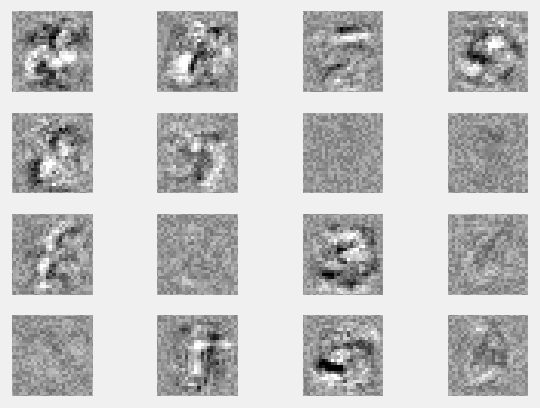

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin1, random_state=0, test_size=0.7)

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)


with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)

vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())


plt.show()

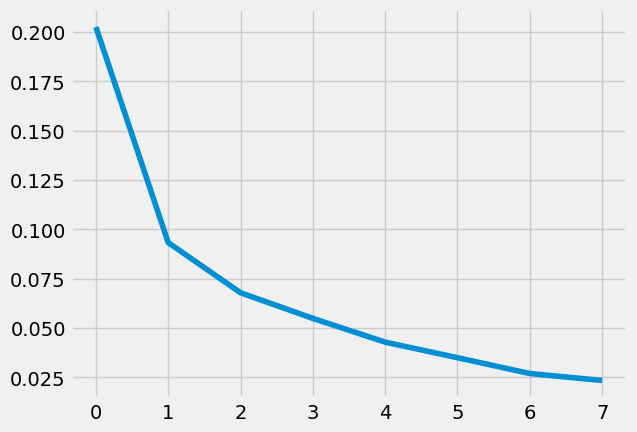

In [ ]:
sns.lineplot(mlp.loss_curve_);

Iteration 1, loss = 0.05562927
Iteration 2, loss = 0.02006445
Iteration 3, loss = 0.01415596
Iteration 4, loss = 0.01042314
Iteration 5, loss = 0.00852513
Iteration 6, loss = 0.00605815
Iteration 7, loss = 0.00526103
Iteration 8, loss = 0.00405700
Training set score: 0.999476
Test set score: 0.995347


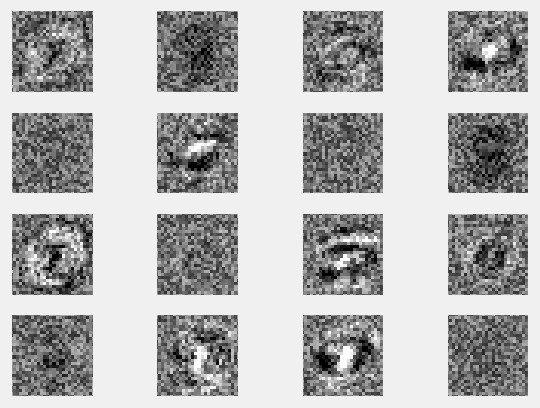

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin2, random_state=0, test_size=0.7)

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)


with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)

vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())


plt.show()

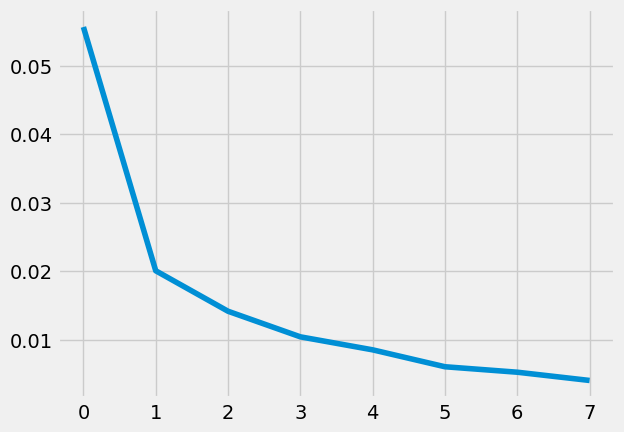

In [ ]:
sns.lineplot(mlp.loss_curve_);